## Churchland Widefield Data

This notebook demonstrates:
- Plot PCA latents and PCA latent trajectory for left vs right
- Plot PCA latents and PCA latent trajectory for reward vs non-reward
- Check out trajectories using SLDS
This is done in the representative mSM30 mouse, for the 10-Oct-2017 session. This is a sanity check, performed on the period around the presentation of the spout

In [1]:
import numpy as np
import pandas as pd
import ssm
import seaborn as sns
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy.linalg as la
from collections import OrderedDict
from matplotlib.font_manager import FontProperties
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat
from sklearn.decomposition import PCA
from ssm import LDS
from Session import *
from LVM import *

sns.set_style("white")
sns.set_context("talk")

## Load Session and run LVM-PCA

In [2]:
session = Session("vistrained", "mSM30", "10-Oct-2017")
levergrab_activity = session.get_lever_grab_activity()
lvm_pca = LVM_PCA(levergrab_activity)
latents = lvm_pca.generate_latents()

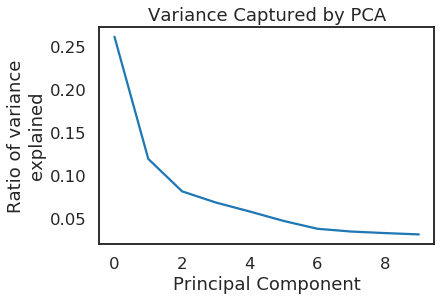

In [6]:
# Plot the variances captured by PCs over all trials
variances = np.array(lvm_pca.pca.explained_variance_ratio_)
variances_few = np.expand_dims(variances[:10], axis=0)
plt.figure()
df = pd.DataFrame(variances_few).melt()
sns.lineplot(x="variable", y="value", data=df)
plt.xlabel("Principal Component")
plt.ylabel("Ratio of variance\nexplained")
plt.title("Variance Captured by PCA")
plt.show()

In [7]:
np.sum(variances[:15])

0.8589910221143205

<Figure size 432x288 with 0 Axes>

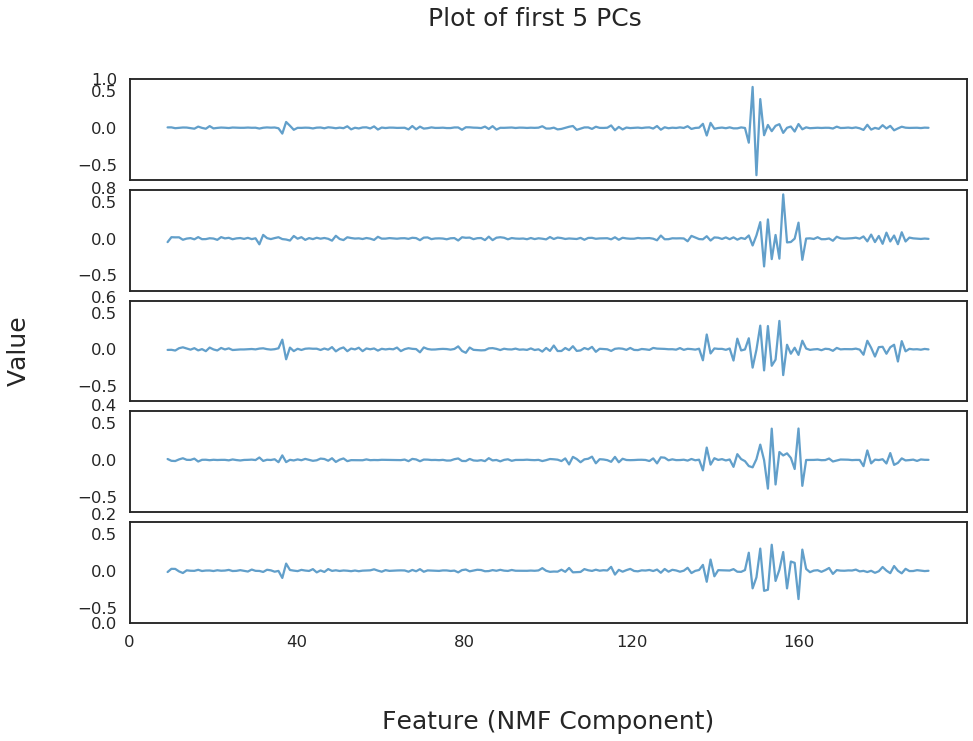

In [39]:
# Plot a few PCs
plt.figure()
num_pcs = 5
fig, axes = plt.subplots(
    nrows=num_pcs, ncols=1, figsize=(15,10),
    gridspec_kw={'height_ratios':[1/num_pcs]*num_pcs, 'hspace':0.1, 'wspace':0.1},
    sharex=True, sharey='col'
    )
for col in range(axes.size):
    ax = axes[col]
    ax.plot(latents[col,:].T, alpha=0.7)
    ax.tick_params(
        axis='both', which='both',
        bottom=False, top=False, left=False, labelbottom=False
        )
fig.add_subplot(111, frameon=False)
plt.xlabel('\n\nFeature (NMF Component)', fontsize=25)
plt.ylabel('Value\n\n', fontsize=25)
plt.suptitle("Plot of first 5 PCs", fontsize=25)
plt.xticks(ticks=np.arange(0,1,.2),labels=np.arange(0,latents.shape[1],40))
plt.show()

## Plot Session PCAs during the quiescent periods

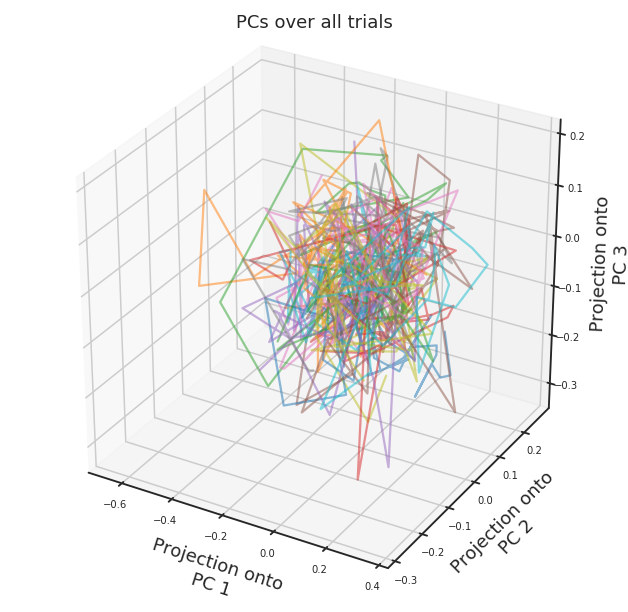

In [9]:
cm = plt.get_cmap('winter')
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111, projection="3d")
for trial in range(20):
    activity = levergrab_activity[trial,:,:]
    projections = lvm_pca.get_latent_projections(activity)
    p1 = projections[:,0]
    p2 = projections[:,1]
    p3 = projections[:,2]
    ax.plot(p1, p2, p3, alpha=0.5)
ax.set_xlabel('\n\nProjection onto\nPC 1')
ax.set_ylabel('\n\nProjection onto\nPC 2')
ax.set_zlabel('\n\nProjection onto\nPC 3')
plt.tick_params(labelsize=10);
plt.title("PCs over all trials\n")
plt.show()

# Plot PC trajectories for a few trials 
We will look at 4-5 trials, for 7 or so PC trajectories

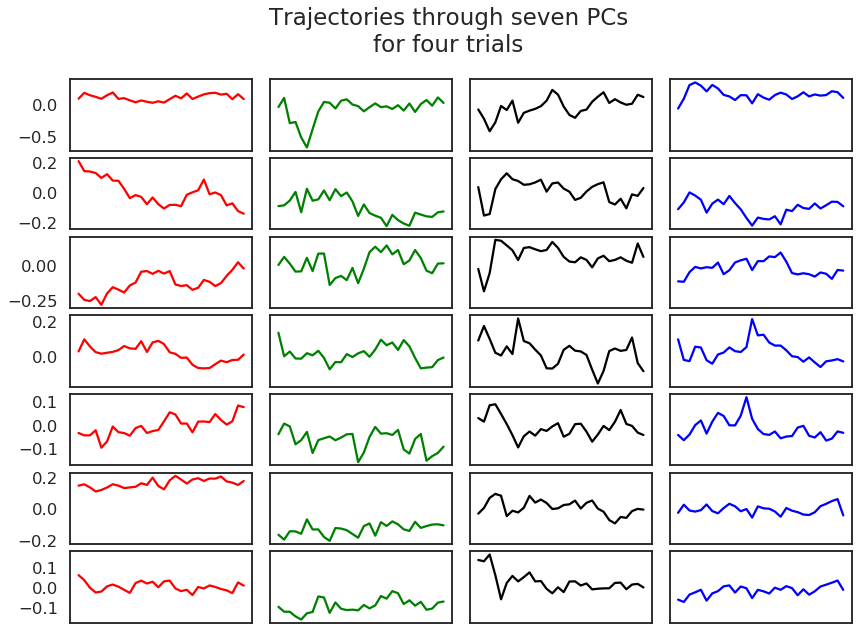

In [38]:
num_trials = 4
num_pcs = 7
fig, axes = plt.subplots(
    nrows=num_pcs, ncols=num_trials, figsize=(14,10),
    gridspec_kw={'height_ratios':[1/num_pcs]*num_pcs, 'hspace':0.1, 'wspace':0.1},
    sharex=False, sharey='row'
    )
for col in range(axes.shape[1]): # Iterate over trials
    activity = levergrab_activity[col,:,:]
    projections = lvm_pca.get_latent_projections(activity)
    color = ['r','g','k','b'][col]
    for row in range(axes.shape[0]): # Iterate over PCs
        projection = projections[:,row]
        ax = axes[row, col]
        ax.plot(projection, color=color)
        ax.tick_params(
            axis='both', which='both',
            bottom=False, top=False, left=False, labelbottom=False
            )

plt.suptitle("Trajectories through seven PCs\nfor four trials", fontsize=23)
plt.show()